In [27]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import string
import random

from sklearn.preprocessing import StandardScaler
from itertools import product
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

import sklearn.metrics as metrics

from matplotlib import pyplot
from matplotlib.pyplot import figure

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from scipy.stats import loguniform
from sklearn import metrics

from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFE

import time
import datetime

from tqdm import tqdm

from imblearn.ensemble import EasyEnsembleClassifier

from imblearn.ensemble import RUSBoostClassifier

from imblearn.datasets import make_imbalance

from sklearn.model_selection import cross_validate

from sklearn.dummy import DummyClassifier

from imblearn.ensemble import BalancedRandomForestClassifier

import warnings
from sklearn.exceptions import ConvergenceWarning

from imblearn.ensemble import BalancedBaggingClassifier

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import HistGradientBoostingClassifier
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
    warnings.warn("future", FutureWarning)
    warnings.warn("converagence", ConvergenceWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
from sklearn import *

## Initialization 

In [2]:
# set up google cloud to store the future records of hypertune
import gspread
sa = gspread.service_account(filename="kaggle-hypertune-records-1d18a6abfb85.json")

In [98]:
# import data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission_data = pd.read_csv('sample_submission.csv')

In [99]:
# basic information
train_data.info()

# describe the data
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1340 non-null   int64 
 1   Age                       1340 non-null   int64 
 2   Attrition                 1340 non-null   object
 3   BusinessTravel            1340 non-null   object
 4   DailyRate                 1340 non-null   int64 
 5   Department                1340 non-null   object
 6   DistanceFromHome          1340 non-null   int64 
 7   Education                 1340 non-null   int64 
 8   EducationField            1340 non-null   object
 9   EmployeeCount             1340 non-null   int64 
 10  EnvironmentSatisfaction   1340 non-null   int64 
 11  Gender                    1340 non-null   object
 12  HourlyRate                1340 non-null   int64 
 13  JobInvolvement            1340 non-null   int64 
 14  JobLevel                

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1317087,40,No,Travel_Rarely,1398,Cardiology,2,4,Life Sciences,1,...,4,80,0,21,2,3,20,15,1,12
1,1548175,40,No,Travel_Rarely,1300,Maternity,24,2,Technical Degree,1,...,1,80,2,9,3,3,9,8,4,7
2,1215433,25,No,Travel_Rarely,622,Cardiology,13,1,Medical,1,...,3,80,0,7,1,3,7,4,0,6
3,1375351,33,No,Travel_Rarely,922,Maternity,1,5,Medical,1,...,3,80,1,10,2,3,6,1,0,5
4,1028734,39,No,Travel_Frequently,505,Maternity,2,4,Technical Degree,1,...,4,80,0,20,1,3,19,6,11,8


In [100]:
# check for missing data
train_data.isnull().sum()
test_data.isnull().sum()
# there is no missing data

EmployeeID                  0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [6]:
# check for duplicated data
train_data.duplicated().sum()
train_data.duplicated().sum()

0

In [82]:
# feature engineering
# Categorical -> Numerical

def quantifyCategoricalTest(dataset):
    dataset = pd.get_dummies(dataset, columns=["Department","EducationField","JobRole","MaritalStatus"], drop_first = True)
    dataset['BusinessTravel'].replace(['Non-Travel','Travel_Rarely', 'Travel_Frequently'], [0, 1, 2], inplace=True)
    dataset['Gender'].replace(['Female', 'Male'], [0, 1], inplace=True)
    dataset['Over18'].replace(['N', 'Y'], [0, 1], inplace=True)
    dataset['OverTime'].replace(['No', 'Yes'], [0, 1], inplace=True)
    
    return dataset

def quantifyCategoricalTrain(dataset):
    dataset = quantifyCategoricalTest(dataset)
    dataset['Attrition'].replace(['No', 'Yes'], [0, 1], inplace=True)
    
    return dataset

In [101]:
train_data = quantifyCategoricalTrain(train_data)
test_data = quantifyCategoricalTest(test_data)

In [102]:
# drop data
train_data = train_data.drop(['EmployeeID','EmployeeCount', 'Over18', 'StandardHours'], axis=1)
test_data = test_data.drop(['EmployeeID','EmployeeCount', 'Over18', 'StandardHours'], axis=1)

In [10]:
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Married,MaritalStatus_Single
0,40,0,1,1398,2,4,3,0,79,3,...,0,0,0,0,1,0,0,0,1,0
1,40,0,1,1300,24,2,1,1,62,3,...,0,0,0,1,0,0,1,0,0,0
2,25,0,1,622,13,1,2,1,40,3,...,0,1,0,0,0,0,1,0,1,0
3,33,0,1,922,1,5,1,0,95,4,...,0,1,0,0,1,0,0,0,0,0
4,39,0,2,505,2,4,3,0,64,3,...,0,0,0,1,0,0,1,0,0,1


In [11]:
train_data.describe()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Married,MaritalStatus_Single
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,...,1340.000000,1340.000000,1340.00000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,36.580597,0.118657,1.092537,799.197761,9.193284,2.924627,2.709701,0.594030,65.559701,2.717910,...,0.111940,0.301493,0.05597,0.090299,0.067910,0.485821,0.323881,0.113433,0.462687,0.316418
std,9.013072,0.323505,0.534490,399.333256,8.141621,1.036088,1.099961,0.491262,20.335025,0.717523,...,0.315411,0.459077,0.22995,0.286716,0.251686,0.499986,0.468130,0.317240,0.498792,0.465252
min,18.000000,0.000000,0.000000,102.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,2.000000,2.000000,2.000000,0.000000,48.000000,2.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,0.000000,1.000000,796.000000,7.000000,3.000000,3.000000,1.000000,65.000000,3.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,0.000000,1.000000,1153.000000,14.000000,4.000000,4.000000,1.000000,83.000000,3.000000,...,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,60.000000,1.000000,2.000000,1499.000000,29.000000,5.000000,4.000000,1.000000,100.000000,4.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


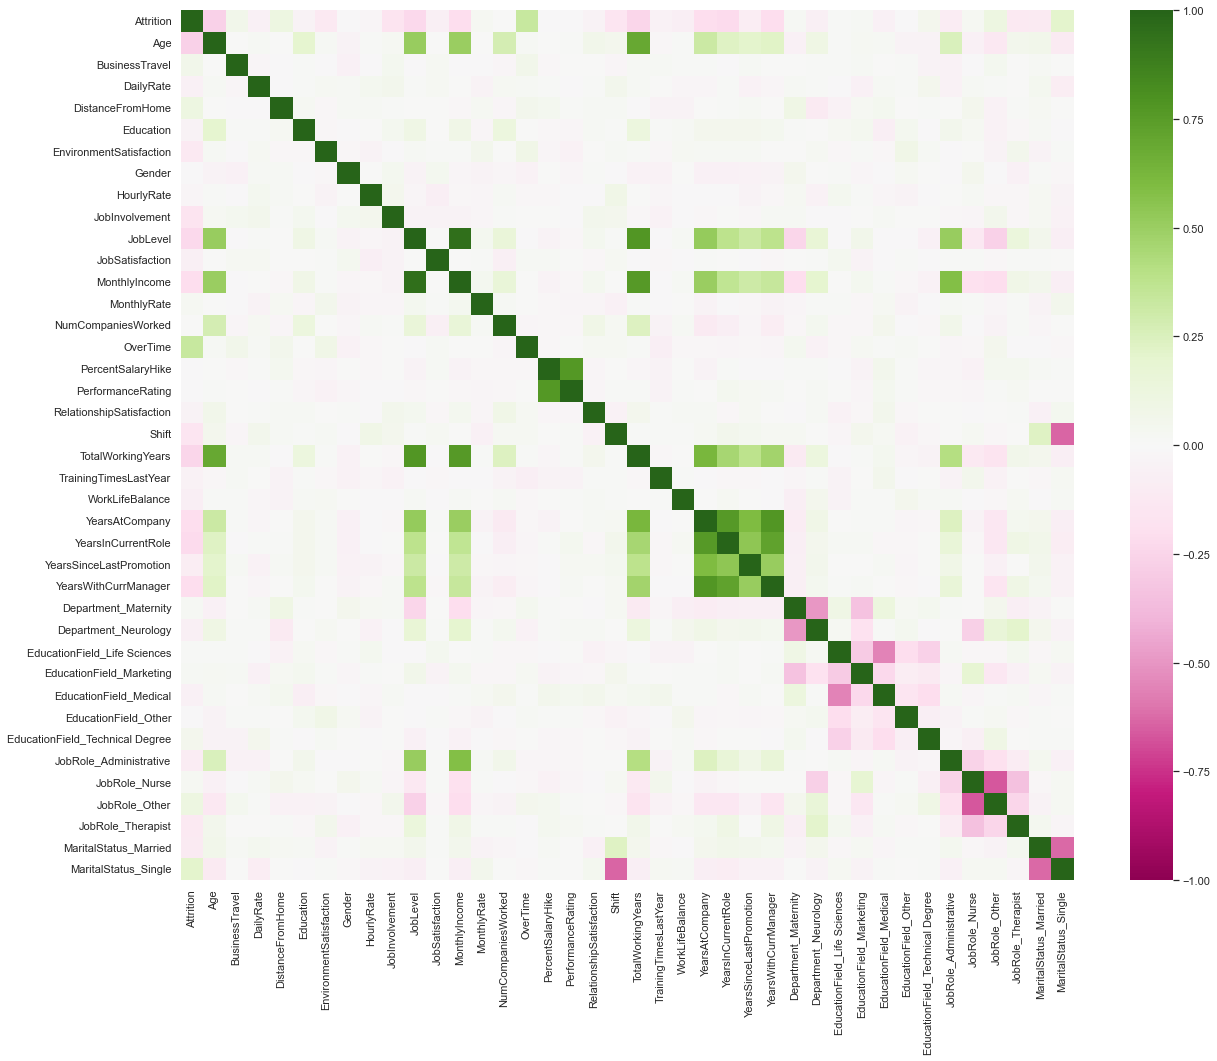

In [103]:
attrition = train_data.pop('Attrition')
train_data.insert(0, 'Attrition', attrition)
  
correlation_matrix = train_data.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = False, cmap="PiYG", vmin=-1, vmax=1)
sns.set(rc = {'figure.figsize':(20,16)})
plt.show()

In [13]:
# drop data
train_data = train_data.drop(['MonthlyIncome', "TotalWorkingYears", 'PerformanceRating', 'YearsInCurrentRole', 
                              'YearsSinceLastPromotion', 'YearsWithCurrManager',"JobRole_Nurse", 
                              "MaritalStatus_Married","Shift"], axis=1)
test_data = test_data.drop(['MonthlyIncome', "TotalWorkingYears", 'PerformanceRating', 'YearsInCurrentRole', 
                              'YearsSinceLastPromotion', 'YearsWithCurrManager',"JobRole_Nurse", 
                              "MaritalStatus_Married","Shift"], axis=1)

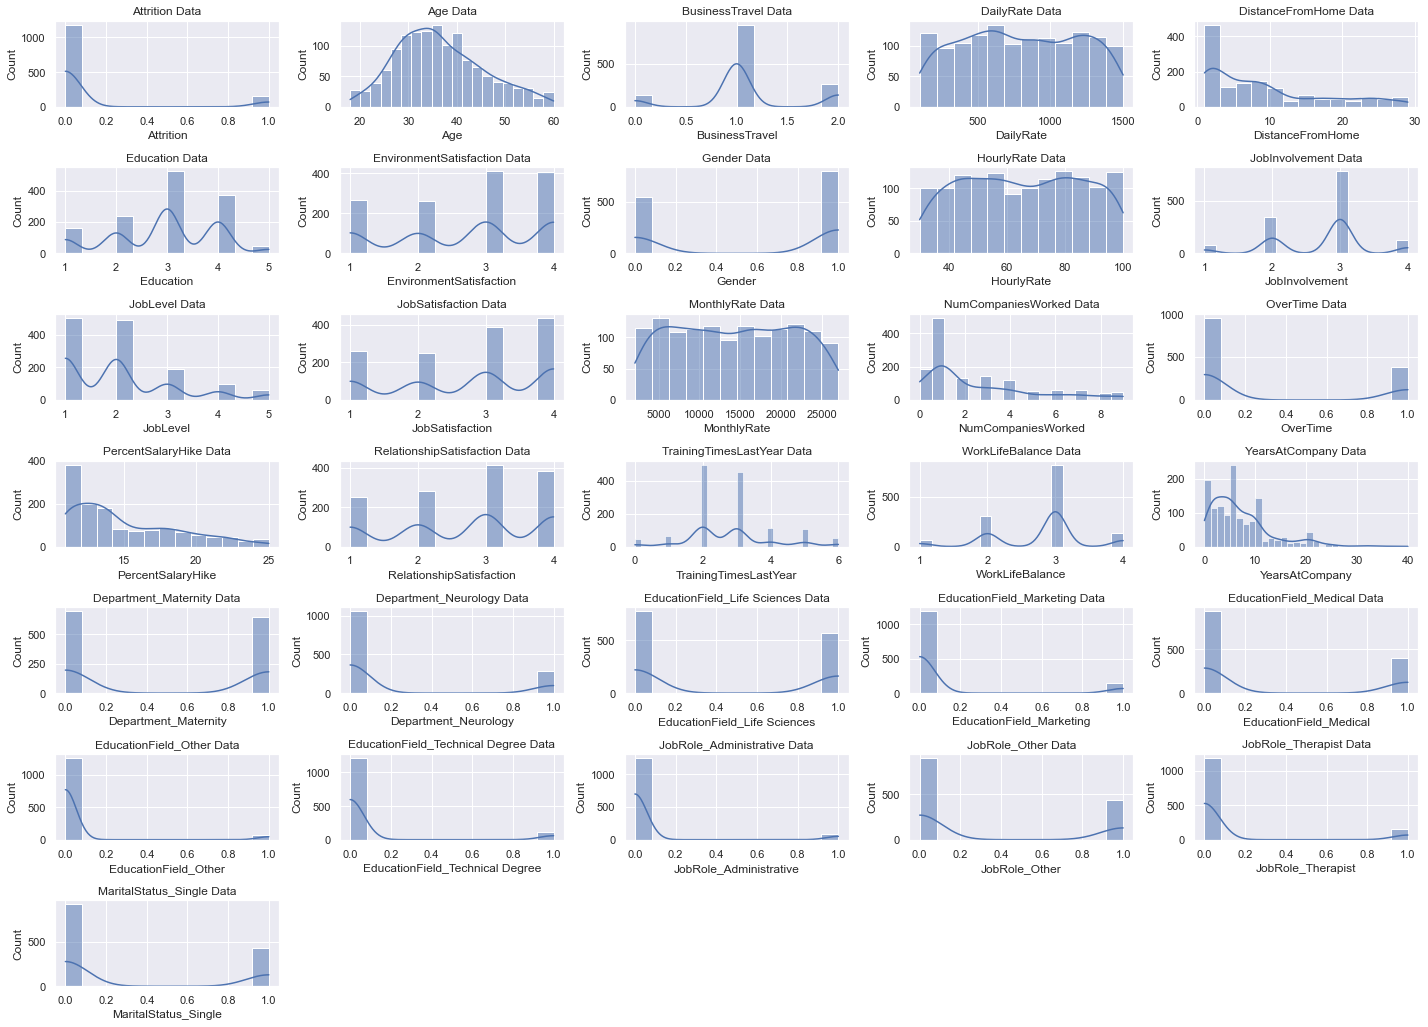

In [14]:
# plt.figure(figsize=(12,21))
for i,col in enumerate(train_data.columns,1):
    plt.subplot(8,5,i)
    plt.title(f"{col} Data")
    sns.histplot(train_data[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [57]:
# feature engineering
# log
def log_for_longtail(df):
    df['DistanceFromHome'] = np.log((1+ df['DistanceFromHome'] ))
    df['JobLevel'] = np.log((1+ df['JobLevel'] ))
    df['NumCompaniesWorked'] = np.log((1+  df['NumCompaniesWorked']))
    df['PercentSalaryHike'] = np.log((1+ df['PercentSalaryHike'] ))
    df['YearsAtCompany'] = np.log((1+ df['YearsAtCompany'] ))

    return df

In [104]:
# # feature engineering
# # log
# def log_for_longtail(df):
#     df['DistanceFromHome'] = np.log((1+ df['DistanceFromHome'] ))
#     df['JobLevel'] = np.log((1+ df['JobLevel'] ))
#     df['MonthlyIncome'] = np.log((1+ df['MonthlyIncome'] ))
#     df['NumCompaniesWorked'] = np.log((1+  df['NumCompaniesWorked']))
#     df['PercentSalaryHike'] = np.log((1+ df['PercentSalaryHike'] ))
#     df['TotalWorkingYears'] = np.log((1+ df['TotalWorkingYears'] ))
#     df['YearsInCurrentRole'] = np.log((1+ df['YearsInCurrentRole'] ))
#     df['YearsAtCompany'] = np.log((1+ df['YearsAtCompany'] ))
#     df['YearsSinceLastPromotion'] = np.log((1+df['YearsSinceLastPromotion']  ))
#     df['YearsWithCurrManager'] = np.log((1+ df['YearsWithCurrManager']  ))

#     return df

In [105]:
train_data = log_for_longtail(train_data)
test_data = log_for_longtail(test_data)

In [88]:
print(len(train_data.columns))

40


## feature selection

In [106]:
# split data into X and y (data and label)
X_nondrop = train_data.drop(columns=['Attrition'], axis = 1)
y = train_data['Attrition']

In [90]:
X_nondrop_scaled =  StandardScaler().fit_transform(X_nondrop) 

In [48]:
classes_count = y.value_counts()
classes_count

0    1181
1     159
Name: Attrition, dtype: int64

In [28]:
index = ['Logistic regression',
         'Random Forest',
         'Logistic regression with balanced class weights',
         'Balanced random forest',
         'Balanced bag of histogram gradient boosting']

scores = {"Accuracy": [], "Balanced accuracy": [], "f1": [], "f1_weighted":[]}

scoring = ["accuracy", "balanced_accuracy", "f1", "f1_weighted"]

clfs =  [LogisticRegression(n_jobs=-1), RandomForestClassifier(n_jobs=-1), 
        LogisticRegression(class_weight="balanced", n_jobs=-1), 
        BalancedRandomForestClassifier(n_jobs=-1), BalancedBaggingClassifier(
        base_estimator=HistGradientBoostingClassifier(random_state=42),
        n_jobs=-1)]

In [29]:

for i in clfs:
    cv_result = cross_validate(i, X_nondrop_scaled, y, scoring=scoring)
    scores["Accuracy"].append(cv_result["test_accuracy"].mean())
    scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())
    scores["f1"].append(cv_result["test_f1"].mean())
    scores["f1_weighted"].append(cv_result["test_f1_weighted"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy,f1,f1_weighted
Logistic regression,0.935821,0.806290,0.694960,0.932069
Random Forest,0.914179,0.665722,0.479481,0.896930
Logistic regression with balanced class weights,0.869403,0.866068,0.610142,0.884530
Balanced random forest,0.857463,0.859197,0.589179,0.875258
Balanced bag of histogram gradient boosting,0.895522,0.869887,0.655377,0.904842


RandomForestClassifier(random_state=42) Optimal number of features : 12, achieving F1: 0.520


/Users/minghuizhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

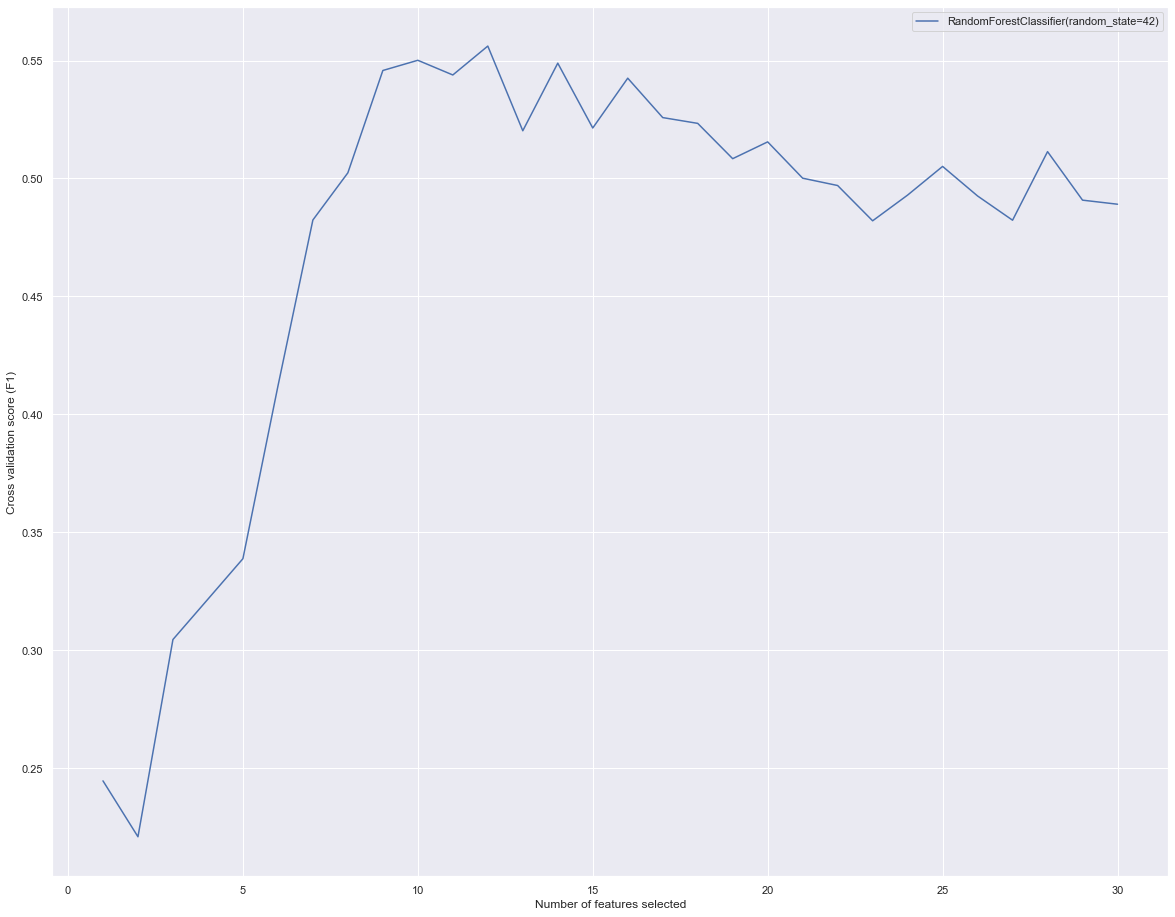

In [30]:
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

from sklearn.feature_selection import RFECV

estimator_for_feature = [RandomForestClassifier(random_state=42)]


plt.figure(figsize=(8,6))
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (F1)")

for i in estimator_for_feature:
    rfecv = RFECV(
        estimator = i,scoring = "f1", step = 1,n_jobs=-1, verbose=0,
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats= 3, random_state=42),
        min_features_to_select=1)
    rfecv.fit(X_nondrop, y)

    print("%s Optimal number of features : %d, achieving F1: %.3f" % 
      (i, rfecv.n_features_, mean(rfecv.grid_scores_[rfecv.n_features_])))

    # Plot number of features VS. cross-validation scores

    plt.plot(
        range(1, len(rfecv.grid_scores_) + 1),
       [mean(j) for j in rfecv.grid_scores_], label = str(i))
    
plt.legend()
plt.show()

In [31]:
# define RFE
rfe_lg = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=12)

# fit RFE
rfe_lg.fit(X_nondrop, y)

# summarize all features
dict_for_feature_select_lg = dict()
dt = pd.DataFrame(columns=["Feature Name", "Selected"])

for i in range(X_nondrop.shape[1]):
    dict_for_feature_select_lg[X_nondrop.columns[i]] = rfe_lg.support_[i]
    new = [str(X_nondrop.columns[i]), str(rfe_lg.support_[i])]
    dt.loc[len(dt.index)] = new
    
print(dt)

                       Feature Name Selected
0                               Age     True
1                    BusinessTravel    False
2                         DailyRate     True
3                  DistanceFromHome     True
4                         Education    False
5           EnvironmentSatisfaction     True
6                            Gender    False
7                        HourlyRate     True
8                    JobInvolvement     True
9                          JobLevel     True
10                  JobSatisfaction    False
11                      MonthlyRate     True
12               NumCompaniesWorked     True
13                         OverTime     True
14                PercentSalaryHike     True
15         RelationshipSatisfaction    False
16            TrainingTimesLastYear    False
17                  WorkLifeBalance    False
18                   YearsAtCompany     True
19             Department_Maternity    False
20             Department_Neurology    False
21     Edu

In [32]:
dict_for_feature_select_list = []

for col in X_nondrop.columns:
    if dict_for_feature_select_lg[col] == False:
        dict_for_feature_select_list.append(col)

X_drop = X_nondrop.drop(dict_for_feature_select_list, axis=1)

print(X_drop.shape)

(1340, 12)


In [107]:
X = X_nondrop


# apply standard scaler onto the training data
scale = StandardScaler()
scale.fit(X)
X = scale.transform(X)

In [36]:
import json
from json import dumps


In [108]:
# source: Matt. Validation Curve Plot from GridSearchCV Results. 
# Retrieved from https://matthewbilyeu.com/blog/2019-02-05/validation-curve-plot-from-gridsearchcv-results
import numbers
def plot_grid_search_validation_curve(grid, param_to_vary,
                                      title='Validation Curve', ylim=None,
                                      xlim=None, log=None):
    """Plots train and cross-validation scores from a GridSearchCV instance's
    best params while varying one of those params."""

    df_cv_results = pd.DataFrame(grid.cv_results_)
    
    print(type(df_cv_results))
    train_scores_mean = df_cv_results['mean_train_score']
    valid_scores_mean = df_cv_results['mean_test_score']
    train_scores_std = df_cv_results['std_train_score']
    valid_scores_std = df_cv_results['std_test_score']

    param_cols = [c for c in df_cv_results.columns if c[:6] == 'param_']
    param_ranges = [grid.param_grid[p[6:]] for p in param_cols]
    param_ranges_lengths = [len(pr) for pr in param_ranges]

    train_scores_mean = np.array(train_scores_mean).reshape(*param_ranges_lengths)
    valid_scores_mean = np.array(valid_scores_mean).reshape(*param_ranges_lengths)
    train_scores_std = np.array(train_scores_std).reshape(*param_ranges_lengths)
    valid_scores_std = np.array(valid_scores_std).reshape(*param_ranges_lengths)

    param_to_vary_idx = param_cols.index('param_{}'.format(param_to_vary))

    slices = []
    for idx, param in enumerate(grid.best_params_):
        if (idx == param_to_vary_idx):
            slices.append(slice(None))
            continue
        best_param_val = grid.best_params_[param]
        idx_of_best_param = 0
        if isinstance(param_ranges[idx], np.ndarray):
            idx_of_best_param = param_ranges[idx].tolist().index(best_param_val)
        else:
            idx_of_best_param = param_ranges[idx].index(best_param_val)
        slices.append(idx_of_best_param)

    train_scores_mean = train_scores_mean[tuple(slices)]
    valid_scores_mean = valid_scores_mean[tuple(slices)]
    train_scores_std = train_scores_std[tuple(slices)]
    valid_scores_std = valid_scores_std[tuple(slices)]
    
    plt.figure(figsize=(8,6))
    plt.clf()

    plt.title(title)
    plt.xlabel(param_to_vary)
    plt.ylabel('Score')

    if (ylim is None):
        plt.ylim(0.0, 1.1)
    else:
        plt.ylim(*ylim)

    if (not (xlim is None)):
        plt.xlim(*xlim)

    lw = 2

    plot_fn = plt.plot
    if log:
        plot_fn = plt.semilogx

    param_range = param_ranges[param_to_vary_idx]
    if (not isinstance(param_range[0], numbers.Number)):
        param_range = [str(x) for x in param_range]
    plot_fn(param_range, train_scores_mean, label='Training score', color='r',
            lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='r', lw=lw)
    plot_fn(param_range, valid_scores_mean, label='Cross-validation score',
            color='b', lw=lw)
    plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1,
                     color='b', lw=lw)

    plt.legend(loc='lower right')

    plt.show()

In [145]:
# modeling
sample_weight = np.array([10 if i == 1 else 1 for i in y])
def hypertune_fit_eval(estimator, param_grid):
    
    grid_obj = GridSearchCV(estimator = estimator, param_grid = param_grid, return_train_score=True,
                              cv = StratifiedKFold(), verbose=0, n_jobs = -1, scoring = "f1", refit = "f1")
    start = time.time()
    grid_obj.fit(X, y)
    end = time.time()
    
    print("\n The best estimator:\n", grid_obj.best_estimator_)
    print("\n The best score:\n", grid_obj.best_score_)
    print("\n The best parameters:\n", grid_obj.best_params_)
    print("\n Train Time:\n", end-start)
    
    random_id_for_kaggle = ''.join(random.choices(string.ascii_uppercase + string.digits, k=10))
    timestamp = str(datetime.datetime.now())
    estimator = str(estimator)
    best_estimator_ = str(grid_obj.best_estimator_)
    train_time = str(end - start)
    best_f1 = str(grid_obj.best_score_)
    X_cols = dict_for_feature_select_list
    
    new_row = [random_id_for_kaggle, timestamp, estimator, best_estimator_,
              train_time, best_f1, X_cols] 
   
    records = sa.open("records").worksheet("Sheet1")
    records_df = pd.DataFrame(records.get_all_records())
    
    nrow = len(records_df)
    
    for i in range(len(new_row)):
        records.update_cell(nrow+2, i+1, json.dumps(new_row[i]))

    return  grid_obj

## Hypertune: LR 

/Users/minghuizhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/minghuizhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/minghuizhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/minghuizhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/minghuizhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/minghuizhu/opt/ana


 The best estimator:
 LogisticRegression(class_weight='balanced', random_state=42, solver='newton-cg')

 The best score:
 0.6660420007122451

 The best parameters:
 {'solver': 'newton-cg'}

 Train Time:
 0.17855310440063477
<class 'pandas.core.frame.DataFrame'>


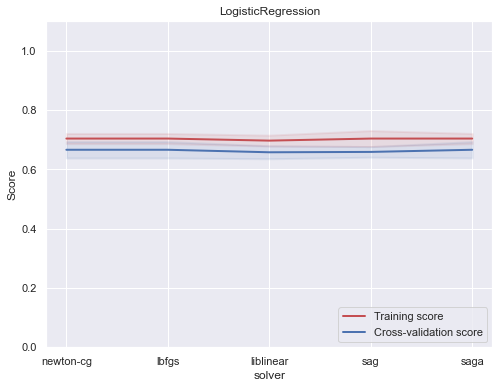

In [110]:
# logistic regression
lr = LogisticRegression(random_state=42, class_weight="balanced")

lr_grid = {
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

best_lr = hypertune_fit_eval(lr, lr_grid)
plot_grid_search_validation_curve(best_lr, 'solver', title='LogisticRegression')


 The best estimator:
 LogisticRegression(C=0.3906939937054613, class_weight='balanced',
                   random_state=42, solver='newton-cg')

 The best score:
 0.6728700486777743

 The best parameters:
 {'C': 0.3906939937054613}

 Train Time:
 0.7589290142059326
<class 'pandas.core.frame.DataFrame'>


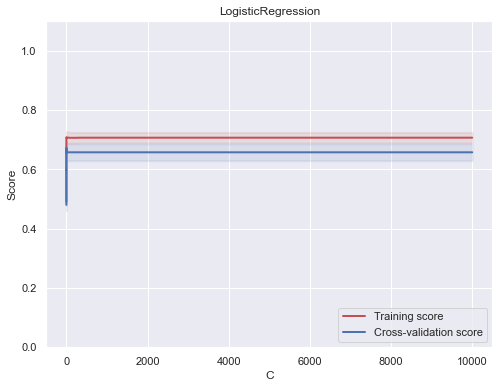

In [111]:
# logistic regression
lr = best_lr.best_estimator_

lr_grid = {
    "C": np.logspace(-4, 4, 50)
}

best_lr = hypertune_fit_eval(lr, lr_grid)
plot_grid_search_validation_curve(best_lr, 'C', title='LogisticRegression')

In [160]:
print(np.logspace(-4,4, 50))

[1.00000000e-04 1.45634848e-04 2.12095089e-04 3.08884360e-04
 4.49843267e-04 6.55128557e-04 9.54095476e-04 1.38949549e-03
 2.02358965e-03 2.94705170e-03 4.29193426e-03 6.25055193e-03
 9.10298178e-03 1.32571137e-02 1.93069773e-02 2.81176870e-02
 4.09491506e-02 5.96362332e-02 8.68511374e-02 1.26485522e-01
 1.84206997e-01 2.68269580e-01 3.90693994e-01 5.68986603e-01
 8.28642773e-01 1.20679264e+00 1.75751062e+00 2.55954792e+00
 3.72759372e+00 5.42867544e+00 7.90604321e+00 1.15139540e+01
 1.67683294e+01 2.44205309e+01 3.55648031e+01 5.17947468e+01
 7.54312006e+01 1.09854114e+02 1.59985872e+02 2.32995181e+02
 3.39322177e+02 4.94171336e+02 7.19685673e+02 1.04811313e+03
 1.52641797e+03 2.22299648e+03 3.23745754e+03 4.71486636e+03
 6.86648845e+03 1.00000000e+04]



 The best estimator:
 LogisticRegression(C=0.3906939937054613, class_weight='balanced',
                   random_state=42, solver='newton-cg')

 The best score:
 0.6728700486777743

 The best parameters:
 {'max_iter': 100}

 Train Time:
 0.11745715141296387
<class 'pandas.core.frame.DataFrame'>


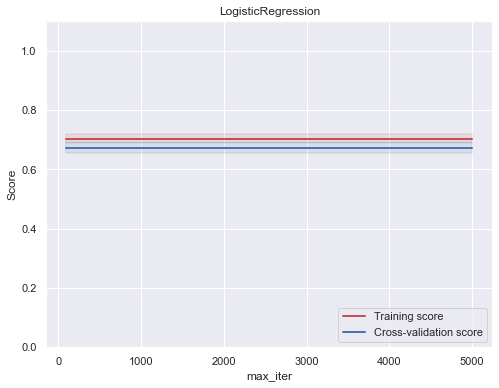

In [113]:
# logistic regression
lr = best_lr.best_estimator_

lr_grid = {
     'max_iter' : [100, 1000,2500, 5000]
}

best_lr = hypertune_fit_eval(lr, lr_grid)
plot_grid_search_validation_curve(best_lr, 'max_iter', title='LogisticRegression')

In [ ]:
# logistic regression
lr = best_lr.best_estimator_
lr_grid = {
    "penalty": ['l1', 'l2', 'elasticnet']
}

best_lr = hypertune_fit_eval(lr, lr_grid)
plot_grid_search_validation_curve(best_lr, 'penalty', title='LogisticRegression')


 The best estimator:
 BalancedRandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

 The best score:
 0.5938415713675168

 The best parameters:
 {'n_estimators': 400}

 Train Time:
 30.14676809310913
<class 'pandas.core.frame.DataFrame'>


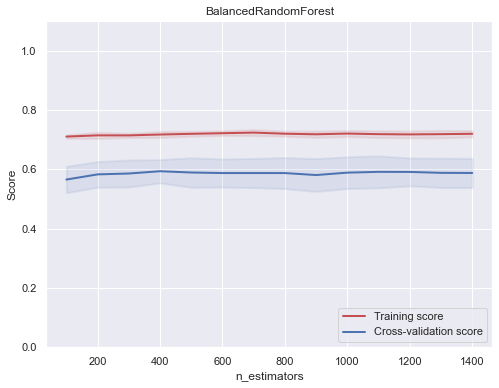

In [97]:
# brf

from imblearn.ensemble import BalancedRandomForestClassifier

# random forest
brf = BalancedRandomForestClassifier(n_jobs= -1, random_state=42)

brf_grid = {'n_estimators': np.arange(100, 1500, 100)
           }
best_brf = hypertune_fit_eval(brf, brf_grid)
plot_grid_search_validation_curve(best_brf, 'n_estimators', title='BalancedRandomForest')



 The best estimator:
 BalancedRandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

 The best score:
 0.5866386404694979

 The best parameters:
 {'max_features': 'sqrt'}

 Train Time:
 4.356066942214966
<class 'pandas.core.frame.DataFrame'>


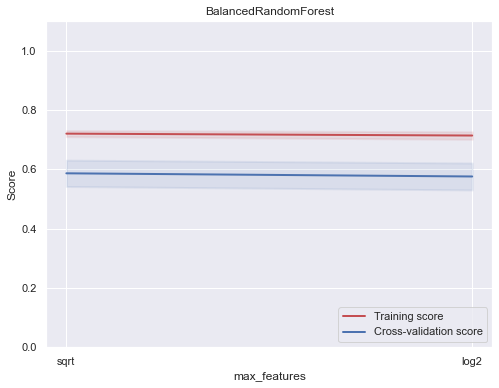

In [65]:
# brf

# random forest
brf = best_brf.best_estimator_

brf_grid = {
               'max_features': ["sqrt", "log2"],
           }
best_brf = hypertune_fit_eval(brf, brf_grid)
plot_grid_search_validation_curve(best_brf, 'max_features', title='BalancedRandomForest')


 The best estimator:
 BalancedRandomForestClassifier(max_depth=9, n_estimators=500, n_jobs=-1,
                               random_state=42)

 The best score:
 0.5900157351880037

 The best parameters:
 {'max_depth': 9}

 Train Time:
 24.133669137954712
<class 'pandas.core.frame.DataFrame'>


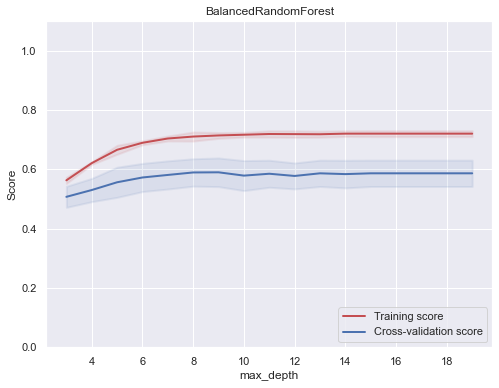

In [66]:
# brf

# random forest
brf = best_brf.best_estimator_

brf_grid = {
               'max_depth': np.arange(3,20,1)
           }
best_brf = hypertune_fit_eval(brf, brf_grid)
plot_grid_search_validation_curve(best_brf, 'max_depth', title='BalancedRandomForest')

/Users/minghuizhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/minghuizhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/minghuizhu/opt/anaconda3/lib/python3.9/site-packages/imblearn/ensemble/_forest.py", line 547, in fit
    samplers_trees = Parallel(
  File "/Users/minghuizhu/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1056, in __call__
    self.retrieve()


 The best estimator:
 BalancedRandomForestClassifier(max_depth=9, n_estimators=500, n_jobs=-1,
                               random_state=42)

 The best score:
 0.5900157351880037

 The best parameters:
 {'min_samples_split': 2}

 Train Time:
 4.845700025558472
<class 'pandas.core.frame.DataFrame'>


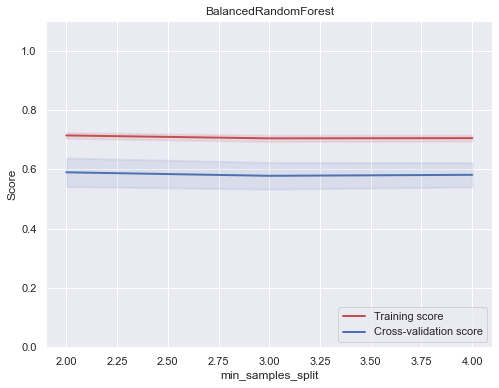

In [67]:
# brf

# random forest
brf = best_brf.best_estimator_

brf_grid = {
               'min_samples_split': np.arange(1,5,1),

           }
best_brf = hypertune_fit_eval(brf, brf_grid)
plot_grid_search_validation_curve(best_brf, 'min_samples_split', title='BalancedRandomForest')


 The best estimator:
 BalancedRandomForestClassifier(max_depth=9, n_estimators=500, n_jobs=-1,
                               random_state=42)

 The best score:
 0.5900157351880037

 The best parameters:
 {'min_samples_leaf': 1}

 Train Time:
 6.5085930824279785
<class 'pandas.core.frame.DataFrame'>


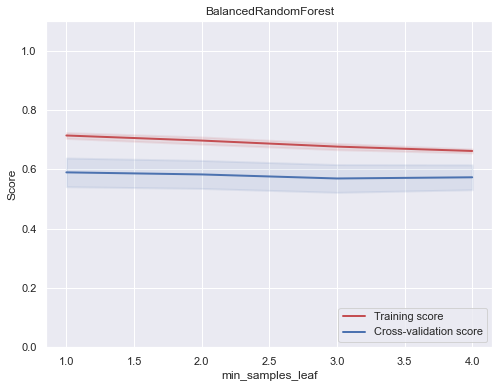

In [68]:
# brf

# random forest
brf = best_brf.best_estimator_

brf_grid = {
               'min_samples_leaf': np.arange(1, 5, 1)
           }
best_brf = hypertune_fit_eval(brf, brf_grid)
plot_grid_search_validation_curve(best_brf, 'min_samples_leaf', title='BalancedRandomForest')


 The best estimator:
 BalancedRandomForestClassifier(bootstrap=False, max_depth=11, n_estimators=900,
                               n_jobs=-1, random_state=42)

 The best score:
 0.6028438503260122

 The best parameters:
 {'bootstrap': False}

 Train Time:
 6.63654088973999
<class 'pandas.core.frame.DataFrame'>


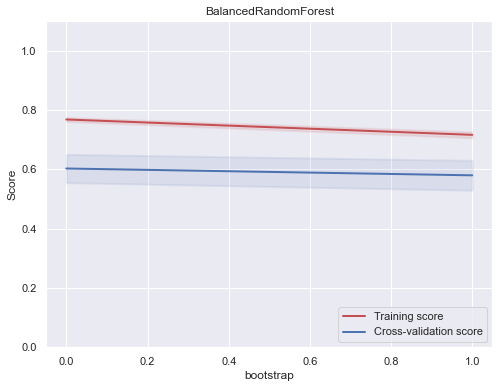

In [70]:
# brf

# random forest
brf = best_brf.best_estimator_

brf_grid = {
               'bootstrap': [True, False]
           }
best_brf = hypertune_fit_eval(brf, brf_grid)
plot_grid_search_validation_curve(best_brf, 'bootstrap', title='BalancedRandomForest')

In [240]:
# gbc
gbc = GradientBoostingClassifier(random_state = 42)
gbc_grid = {
    "n_estimators":np.arange(50, 500, 50),
    "max_depth":[1,3,5,7,9,11,13],
    "learning_rate":np.arange(0.01, 0.3, 0.01),
#     'colsample_bytree': np.arange(0.6, 1.0, 0.1),
#     'colsample_bylevel': np.arange(0.6, 1.0, 0.1),
    'subsample': np.arange(0.6, 1.0, 0.1),
}
best_gbc = hypertune_fit_eval(gbc, gbc_grid)

KeyboardInterrupt: 

In [ ]:
# xgb
xgboost = XGBClassifier()
# Define the search space
param_grid = { 
    # Learning rate shrinks the weights to make the boosting process more conservative
#     "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    # Maximum depth of the tree, increasing it increases the model complexity.
#     "max_depth": range(3,21,3),
    # Gamma specifies the minimum loss reduction required to make a split.
    "gamma": [i/10.0 for i in range(0,5)],
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100],

}

        
xgb_model_tuned = hypertune_fit_eval(xgboost, param_grid)



 The best estimator:
 BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier(random_state=42),
                          n_estimators=400, n_jobs=-1, random_state=42)

 The best score:
 0.6757341052521776

 The best parameters:
 {'n_estimators': 400}

 Train Time:
 311.64144587516785
<class 'pandas.core.frame.DataFrame'>


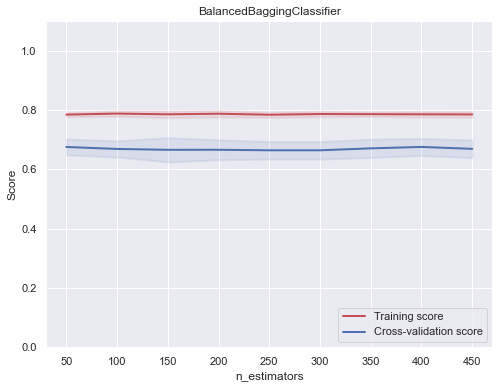

In [71]:
bbc = BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier(random_state=42),random_state=42,
        n_jobs=-1)

bbc_grid = {
    "n_estimators":np.arange(50, 500, 50),
#     "max_depth":[1,3,5,7,9,11,13],
#     "learning_rate":np.arange(0.01, 0.3, 0.01),
#     'colsample_bytree': np.arange(0.6, 1.0, 0.1),
#     'colsample_bylevel': np.arange(0.6, 1.0, 0.1),
#     'subsample': np.arange(0.6, 1.0, 0.1),
}

best_bbc = hypertune_fit_eval(bbc, bbc_grid)
plot_grid_search_validation_curve(best_bbc, 'n_estimators', title='BalancedBaggingClassifier')


 The best estimator:
 BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier(max_depth=9,
                                                                        random_state=42),
                          n_estimators=400, n_jobs=-1, random_state=42)

 The best score:
 0.6757341052521776

 The best parameters:
 {'base_estimator__max_depth': 9}

 Train Time:
 353.4232859611511
<class 'pandas.core.frame.DataFrame'>


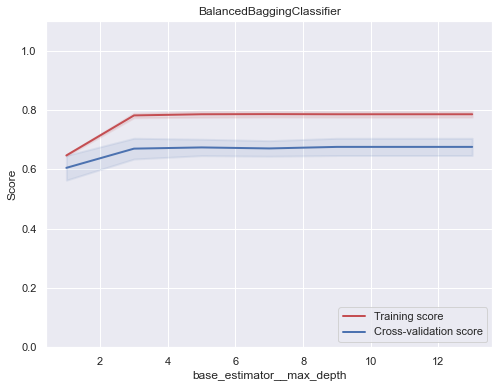

In [76]:
bbc = best_bbc.best_estimator_

bbc_grid = {
    'base_estimator__max_depth': [1,3,5,7,9,11,13]
#     "learning_rate":np.arange(0.01, 0.3, 0.01),
#     'colsample_bytree': np.arange(0.6, 1.0, 0.1),
#     'colsample_bylevel': np.arange(0.6, 1.0, 0.1),
#     'subsample': np.arange(0.6, 1.0, 0.1),
}

best_bbc = hypertune_fit_eval(bbc, bbc_grid)
plot_grid_search_validation_curve(best_bbc,  'base_estimator__max_depth', title='BalancedBaggingClassifier')


 The best estimator:
 BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier(learning_rate=0.28,
                                                                        max_depth=9,
                                                                        random_state=42),
                          n_estimators=400, n_jobs=-1, random_state=42)

 The best score:
 0.6790538188912173

 The best parameters:
 {'base_estimator__learning_rate': 0.28}

 Train Time:
 1648.3858020305634
<class 'pandas.core.frame.DataFrame'>


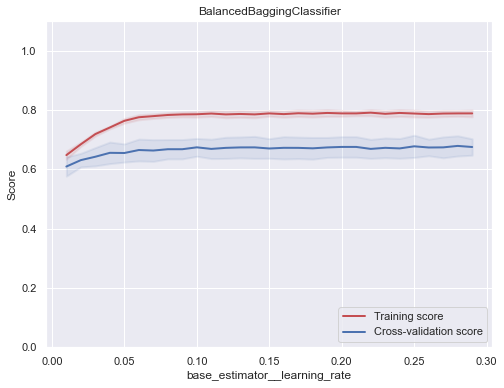

In [116]:
bbc = best_bbc.best_estimator_

bbc_grid = {
     "base_estimator__learning_rate":np.arange(0.01, 0.3, 0.01),
}

best_bbc = hypertune_fit_eval(bbc, bbc_grid)
plot_grid_search_validation_curve(best_bbc,  'base_estimator__learning_rate', title='BalancedBaggingClassifier')

In [334]:
# adaboost
ada = AdaBoostClassifier(random_state = 42)
ada_grid = {
    "n_estimators": [int(i) for i in np.linspace(1, 100, num = 20)],
    "learning_rate": [0.01,0.05,0.1,0.2,0.4,0.5,1],
    "algorithm": ['SAMME', 'SAMME.R']
}
best_ada = hypertune_fit_eval(ada, ada_grid)


 The best estimator:
 AdaBoostClassifier(learning_rate=0.5, n_estimators=84, random_state=42)

 The best score:
 0.7151626111324687

 The best parameters:
 {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 84}

 Train Time:
 20.870769739151


In [ ]:
# easy ensemble

eec = EasyEnsembleClassifier(random_state=42, n_jobs=-1, verbose = 1, base_estimator = GradientBoostingClassifier(max_depth=1, n_estimators=500))
eec_grid = {
    "n_estimators": [int(i) for i in np.linspace(1, 100, num = 20)],
#     "learning_rate": [0.01,0.05,0.1,0.2,0.4,0.5,1,5,10,15,20,30,40,50,60,70,80,90,100],
    "sampling_strategy": ['float', 'str', 'dict', 'callable', 'auto']
}
best_eec = hypertune_fit_eval(eec, eec_grid)


 The best estimator:
 SVC(C=5, kernel='sigmoid', random_state=42)

 The best score:
 0.6556402737047898

 The best parameters:
 {'C': 5}

 Train Time:
 0.20191526412963867
<class 'pandas.core.frame.DataFrame'>


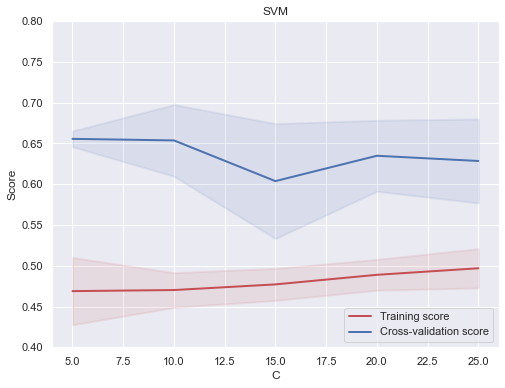

In [138]:
# svm
svm = SVC(random_state=42, kernel="sigmoid")
svm_grid = {
    'C': np.arange(5,30,5)
#     "gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
#     param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
}

best_svm = hypertune_fit_eval(svm, svm_grid)
plot_grid_search_validation_curve(best_svm, 'C', title='SVM', ylim=[0.4,0.8])

In [166]:
n=0
for i in range(0, 43):
    for j in range(i+1, 43):
        n+=1
print(n)

903


In [159]:
# try using voting methods
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
vo = [
    ("lr", best_lr.best_estimator_),
    ("bbc", best_bbc.best_estimator_),
    ("svm", best_svm_smote)]
    

clf = VotingClassifier(estimators=vo)


clf.fit(X,y)




VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.3906939937054613,
                                                 class_weight='balanced',
                                                 random_state=42,
                                                 solver='newton-cg')),
                             ('bbc',
                              BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier(learning_rate=0.28,
                                                                                                      max_depth=9,
                                                                                                      random_state=42),
                                                        n_estimators=400,
                                                        n_jobs=-1,
                                                        random_state=42)),
                             ('svm',
                              GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                                           estimator=SVC(C=4, random_state=42),
                                           n_jobs=-1,
                                           param_grid={'gamma': [0.0001, 0.001,
                                                                 0.01, 0.1, 1,
                                                                 10, 100]},
                                           refit='f1', return_train_score=True,
                                           scoring='f1'))])


 The best estimator:
 SVC(C=4, random_state=42)

 The best score:
 0.6369620575502928

 The best parameters:
 {'C': 4}

 Train Time:
 0.8349130153656006
<class 'pandas.core.frame.DataFrame'>


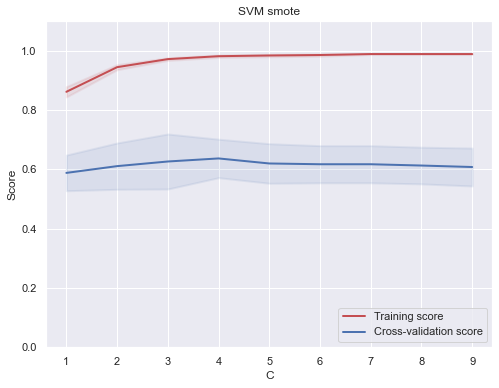

In [141]:
# svm
svm = SVC(random_state=42, kernel="rbf")
svm_grid = {
#     "gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'C': np.arange(1,10,1)
#     param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
}

best_svm_smote = hypertune_fit_eval(svm, svm_grid)
plot_grid_search_validation_curve(best_svm_smote, 'C', title='SVM smote')


 The best estimator:
 SVC(C=4, gamma=0.01, random_state=42)

 The best score:
 0.6770558608058608

 The best parameters:
 {'gamma': 0.01}

 Train Time:
 1.5110981464385986
<class 'pandas.core.frame.DataFrame'>


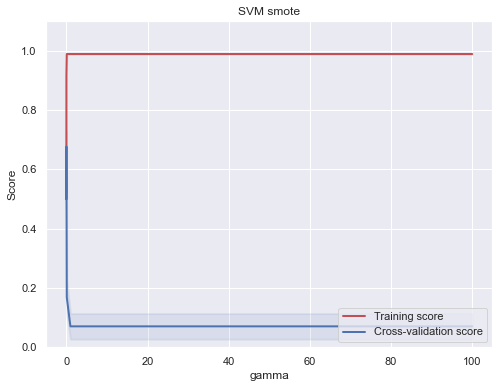

In [155]:
# svm
svm = SVC(random_state=42, kernel="rbf", C=4)
svm_grid = {
    "gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

best_svm_smote = hypertune_fit_eval(svm, svm_grid)
plot_grid_search_validation_curve(best_svm_smote, 'gamma', title='SVM smote')

In [74]:
def create_submission(grid, output='my_submission.csv'):
    clf = grid.best_estimator_
    # define the submission file 
    submission_result = pd.DataFrame()
    # load test_data
    X_submission = test_data
#     X_submission = test_data.drop(dict_for_feature_select_list, axis=1)
    # apply standardscaler fitted earlier
    X_submission = scale.transform(X_submission)
    y_submission = clf.predict(X_submission)
    # record the prediction
    submission_result['Id'] = sample_submission_data['Id']
    submission_result['Predicted'] = y_submission
    # save submission
    submission_result.to_csv(output, index = False)

In [454]:
def create_submission_nondrop(grid, output='my_submission.csv'):
    clf = grid.best_estimator_
    # define the submission file 
    submission_result = pd.DataFrame()
    # load test_data
#     X_submission = test_data
    X_submission = test_data
    # apply standardscaler fitted earlier
    X_submission = scale.transform(X_submission)
    y_submission = clf.predict(X_submission)
    # record the prediction
    submission_result['Id'] = sample_submission_data['Id']
    submission_result['Predicted'] = y_submission
    # save submission
    submission_result.to_csv(output, index = False)

In [ ]:
# rf
create_submission(rf_model_tuned, output='XAJI0Y6DPB.csv')

In [ ]:
# xgb
create_submission(xgb_model_tuned, output='HSAHXTHV3A.csv')

In [115]:
# lg
create_submission(best_lr, output='best_lr.csv')

In [539]:
# lg nondrop
create_submission(best_lr, output='XXXXXXXX.csv')

In [ ]:
# gbc
create_submission(best_model_gbc, output='H75LXO6QJI.csv')

In [335]:
# ada
create_submission(best_ada, output='31Y2R2FLJV.csv')

In [ ]:
# eec
create_submission(best_eec, output='0Y9DOM5IGQ.csv')

In [110]:
# rus
create_submission(best_rus, output='RFZ7JM85VS.csv')

In [276]:
# svm
create_submission(best_svm, output='DEQU0ZEYV9.csv')

In [332]:
# svm smote
create_submission(best_svm_smote, output='WMN25BIKYZ.csv')

In [77]:
# brf
create_submission(best_brf, output='best_brf.csv')

In [117]:
# bbc
create_submission(best_bbc, output='best_bbc.csv')

In [158]:
def create_submission_voting(clf, output='my_submission.csv'):
    clf = clf
    # define the submission file 
    submission_result = pd.DataFrame()
    # load test_data
    X_submission = test_data
    X_submission = scale.transform(X_submission)
    y_submission = clf.predict(X_submission)
    # record the prediction
    submission_result['Id'] = sample_submission_data['Id']
    submission_result['Predicted'] = y_submission
    # save submission
    submission_result.to_csv(output, index = False)
    
# bbc
create_submission_voting(clf, output='best_vog.csv')